In [1]:
print("""
@Title        : 
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-05 20:30:34
@Description  : 
""")


@Title        : 
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-05 20:30:34
@Description  : 



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
CSI300 = yf.download('000300.SS', start='2017-01-01',
                     end='2023-12-05')
df = CSI300[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


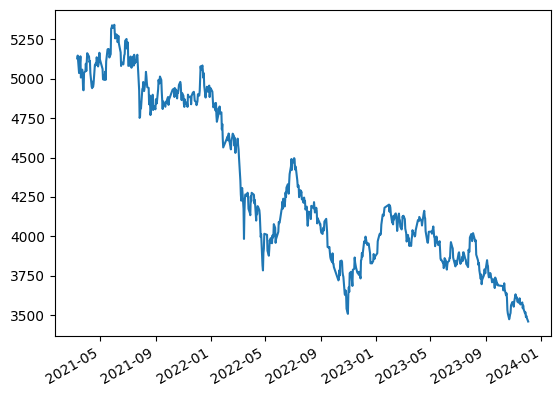

In [58]:
fig, ax = plt.subplots()
ax.plot(df)
fig.autofmt_xdate()

In [59]:
rts = df['Adj Close'].apply(np.log).diff(1).dropna()

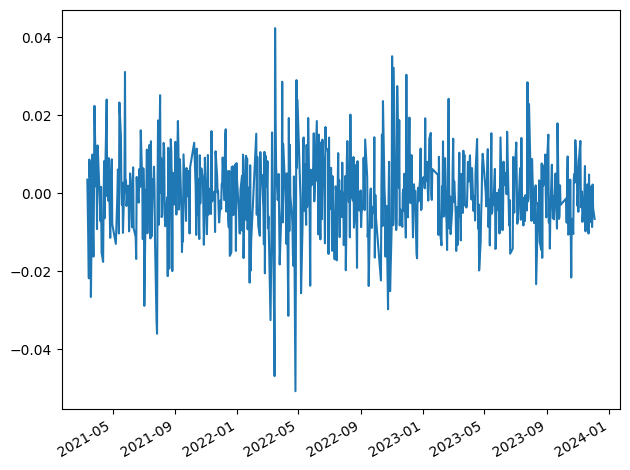

In [62]:
fig, ax = plt.subplots()
ax.plot(rts)
fig.autofmt_xdate()
plt.tight_layout()

In [63]:
from statsmodels.tsa.stattools import adfuller
adfuller(rts)

(-26.11021808488275,
 0.0,
 0,
 663,
 {'1%': -3.4402516575519346,
  '5%': -2.8659091963995573,
  '10%': -2.569096752341498},
 -4007.2690262999213)

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

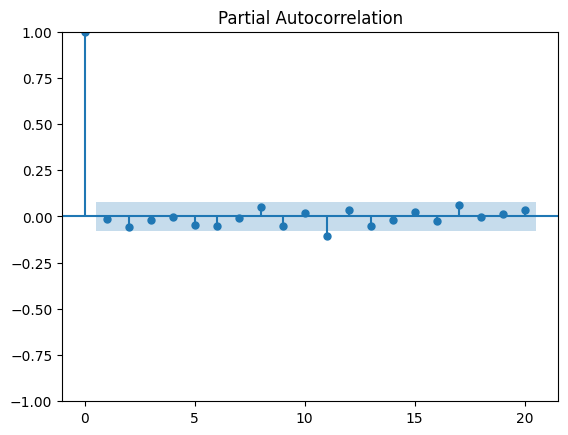

In [65]:
fig = plot_pacf(rts, lags=20)

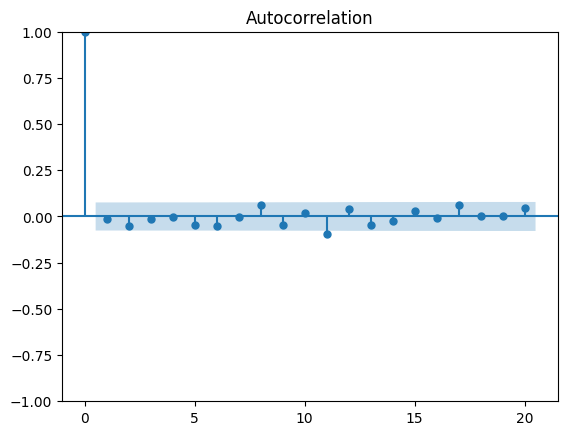

In [66]:
fig = plot_acf(rts, lags=20)

In [67]:
rts

Date
2021-03-12    0.003535
2021-03-15   -0.021773
2021-03-16    0.008664
2021-03-17    0.004224
2021-03-18    0.007988
                ...   
2023-11-28    0.001872
2023-11-29   -0.008623
2023-11-30    0.002259
2023-12-01   -0.003817
2023-12-04   -0.006550
Name: Adj Close, Length: 664, dtype: float64

没法进行时间序列预测，完全是属于噪声